In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import seaborn as sns
from emd_func import compute_pymed_emd
from plot_func import plot_emd, plot_sorted
from coverage_func import plot_scatter, subplot_scatter
from outliers_func import remove_outliers
from trunc_mean_func import truncated_mean
from boxplot_func import create_sns_table_from_big_dict, create_sns_table_from_flat_dict, plot_box_plot

from sklearn.metrics.pairwise import euclidean_distances

from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
#Reading the dictionary data file
curr_dir = !pwd
my_path = curr_dir[0]+"/../6.ExAC_coverage/coverage_states_dicts/zf-C2H2/"
with open(my_path+'zinc_hmm_states_dict_JSD_SE_9.23_cov.pik', 'rb') as handle:
    states_dict = pickle.load(handle)

In [3]:
#Getting the number of states for this domain
states_num = len(states_dict.keys())

### Getting flat dictionaries

In [5]:
#Create a dictionary for AF adjusted values only
states_af_adj_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_af_adj_dict[state].append(d["af_adj"])

In [114]:
#Create a dictionary for SE values only
states_SE_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_SE_dict[state].append(d["SE"])

In [115]:
#Create a dictionary for SE adj values only
states_SE_adj_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_SE_adj_dict[state].append(d["SE_Adj"])

In [108]:
#Create a dictionary for Coverage values only
states_mean_cov_dict = defaultdict(list)
for state in states_dict.keys():
    for d in states_dict[state]:
        states_mean_cov_dict[state].append(d["coverage_mean"])

## Plotting code

### SE EMD plots

/home/anat/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Cambria'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


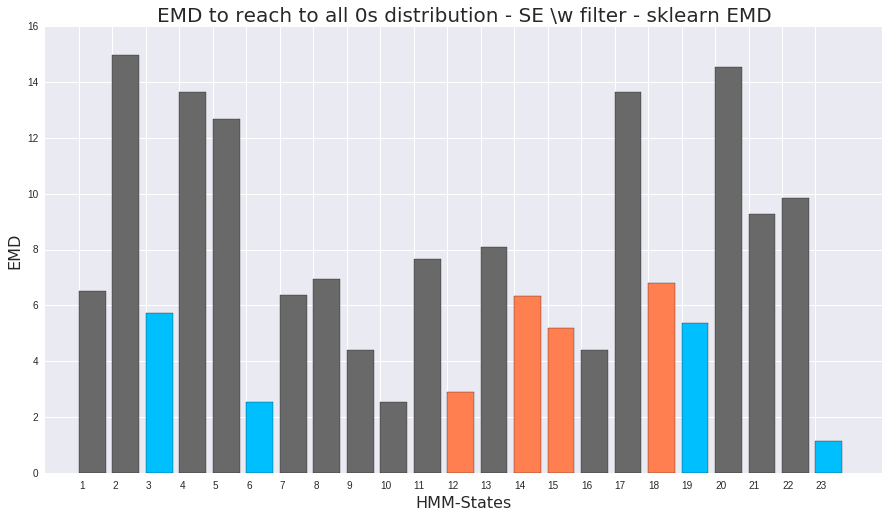

In [30]:
SE_emd_dict = compute_pymed_emd(states_SE_dict, 1000)
plot_emd(SE_emd_dict, "SE \w filter - sklearn EMD", "Zinc_filter_SE_EMD", False, False)

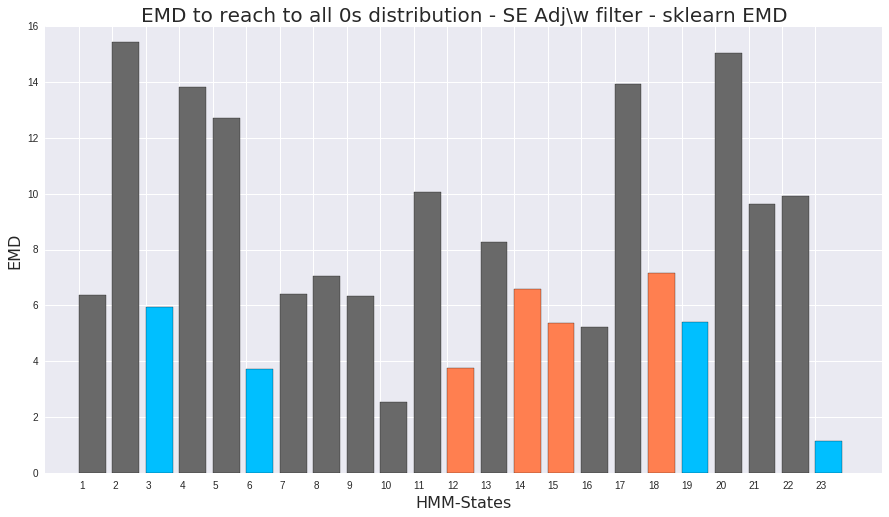

In [32]:
SE_adj_emd_dict = compute_pymed_emd(states_SE_adj_dict, 1000)
plot_emd(SE_adj_emd_dict, "SE Adj\w filter - sklearn EMD", "Zinc_filter_SE_adj_EMD", False, False)

### States sorted by different parameters

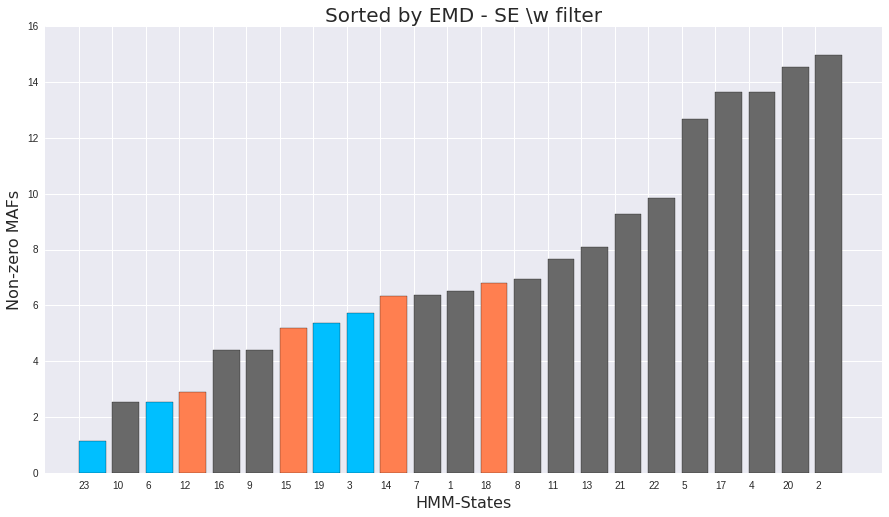

In [34]:
#SE Sort the states by EMD
plot_sorted(SE_emd_dict.values(), "Sorted by EMD", "SE \w filter", "Sorted_EMD_SE_filter", False, False)

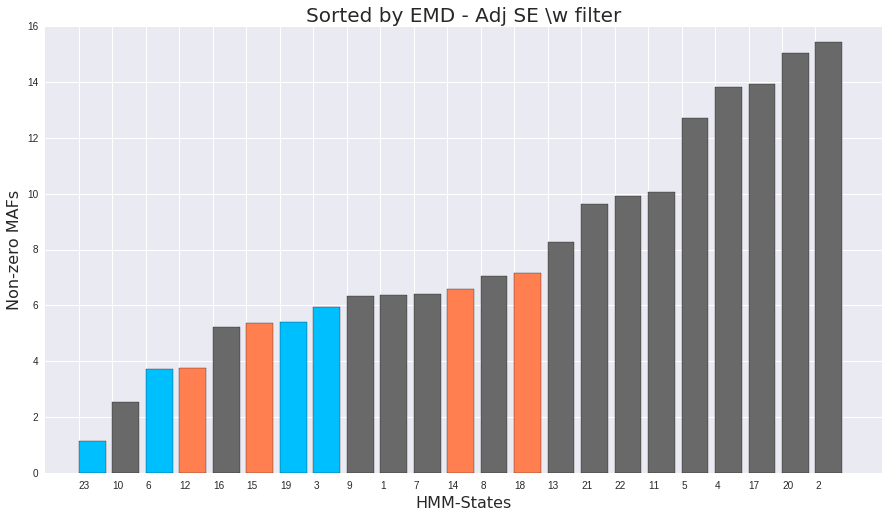

In [33]:
#Adj SE Sort the states by EMD
plot_sorted(SE_adj_emd_dict.values(), "Sorted by EMD", "Adj SE \w filter", "Sorted_EMD_SE_Adj_filter", False, False)

### Coverage scatter plots

### Removing outliers

In [35]:
no_outliers_SE_adj_dict = remove_outliers(states_SE_adj_dict)
no_outliers_SE_adj_emd_dict = compute_pymed_emd(no_outliers_SE_adj_dict, 1000)

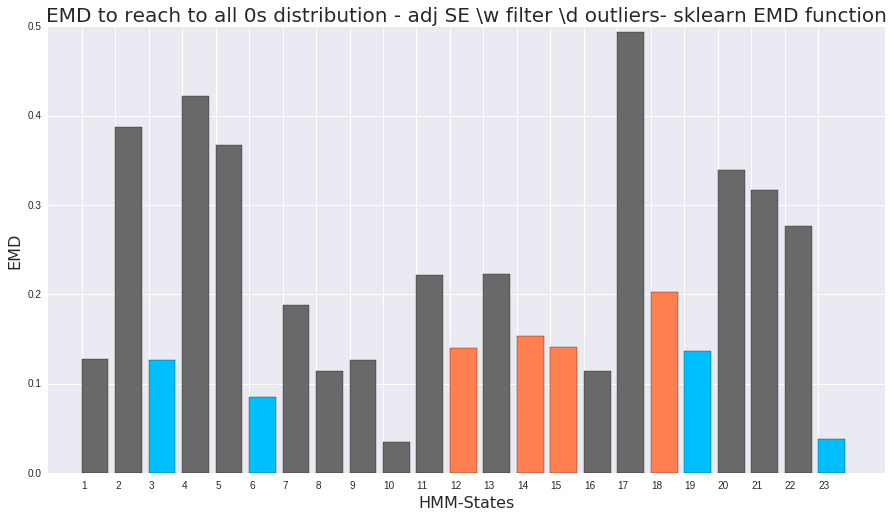

In [36]:
plot_emd(no_outliers_SE_adj_emd_dict, "adj SE \w filter \d outliers- sklearn EMD function", "no_outliers_adj_SE_EMD", False, False)

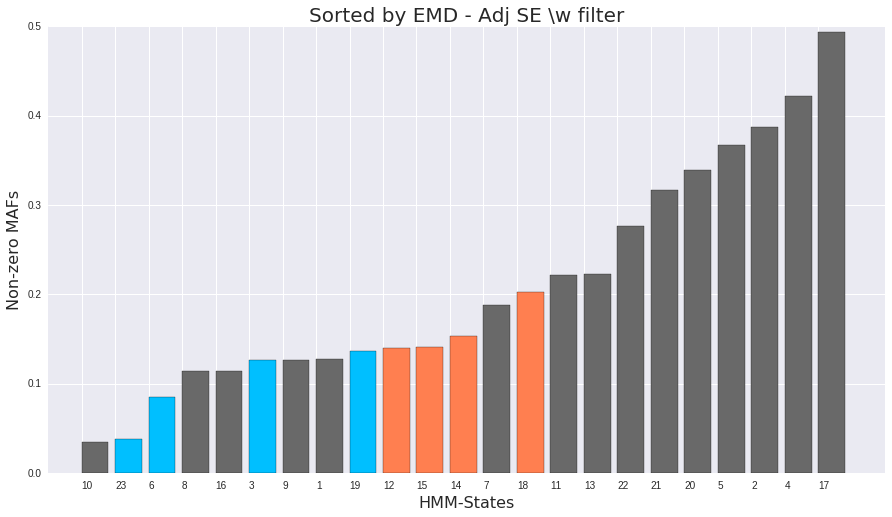

In [37]:
#Adj SE no outliers Sort the states by EMD
plot_sorted(no_outliers_SE_adj_emd_dict.values(), "Sorted by EMD", "Adj SE \w filter", "Sorted_EMD_SE_Adj_outliers_filter", False, False)

### Truncated mean

### Trim 0s before EMD

In [38]:
#Count the number of zero Adj MAF
zero_adj_af = [0] * states_num
for state in states_dict.keys():
    for d in states_dict[state]:
        if (d["af_adj"] == 0):
            zero_adj_af[state-1] += 1

In [39]:
min_0s = min(zero_adj_af)

In [47]:
min_0s

2773

In [40]:
#Trim each state by the same number of data points
states_dict_0s = states_dict.copy()
for state in states_dict_0s.keys():
    #Sort the state list
    state_sorted = sorted(states_dict_0s[state], key=lambda k: k['af_adj'])
    states_dict_0s[state] = state_sorted[min_0s:]

In [41]:
maf_med = []
jsd_med = []
se_med = []
for state in states_dict_0s.keys():
    mafs = []
    jsds = []
    ses = []
    for d in states_dict_0s[state]:
        mafs.append(d["af_adj"])
        jsds.append(d["JSD_adj"])
        ses.append(d["SE_Adj"])
    maf_med.append(np.median(mafs))
    jsd_med.append(np.median(jsds))
    se_med.append(np.median(ses))

In [52]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict_0s = defaultdict(list)
for state in states_dict_0s.keys():
    for d in states_dict_0s[state]:
        states_JSD_adj_dict_0s[state].append(d["JSD_adj"])

In [43]:
#Create a dictionary for SE adj values only
states_SE_adj_dict_0s = defaultdict(list)
for state in states_dict_0s.keys():
    for d in states_dict_0s[state]:
        states_SE_adj_dict_0s[state].append(d["SE_Adj"])

In [59]:
#Create a dictionary for MAF adj values only
states_MAF_adj_dict_0s = defaultdict(list)
for state in states_dict_0s.keys():
    for d in states_dict_0s[state]:
        states_MAF_adj_dict_0s[state].append(d["af_adj"])

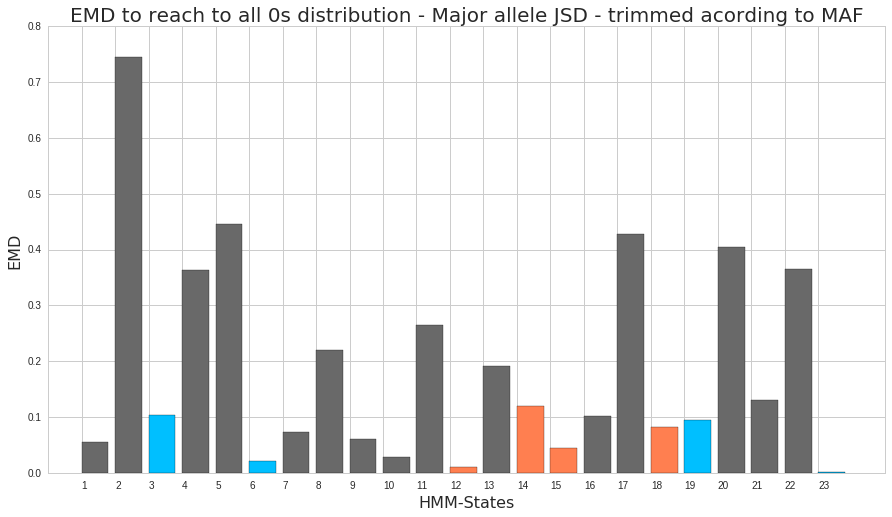

In [65]:
trim0s_emd_dict = compute_pymed_emd(states_JSD_adj_dict_0s, 1000)
plot_emd(trim0s_emd_dict, "Major allele JSD - trimmed acording to MAF", "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

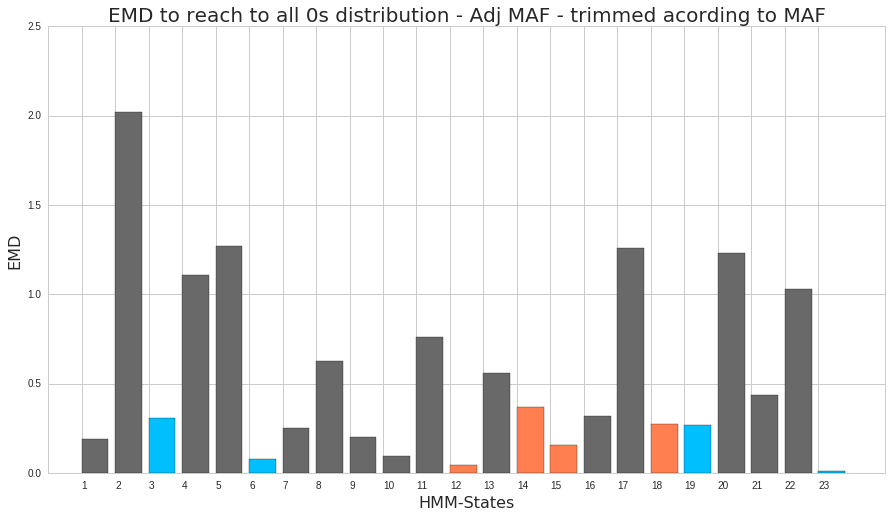

In [63]:
trim0s_maf_emd_dict = compute_pymed_emd(states_MAF_adj_dict_0s, 1000)
plot_emd(trim0s_maf_emd_dict, "Adj MAF - trimmed acording to MAF", "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

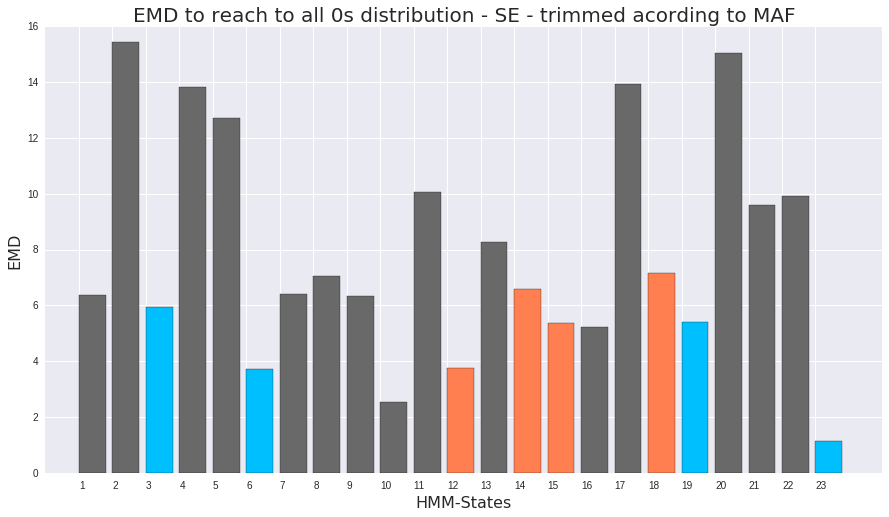

In [44]:
trim0s_SE_emd_dict = compute_pymed_emd(states_SE_adj_dict_0s, 1000)
plot_emd(trim0s_SE_emd_dict, "SE - trimmed acording to MAF", "SNP_Zinc_filter_SE_Major_allele_EMD", False, False)

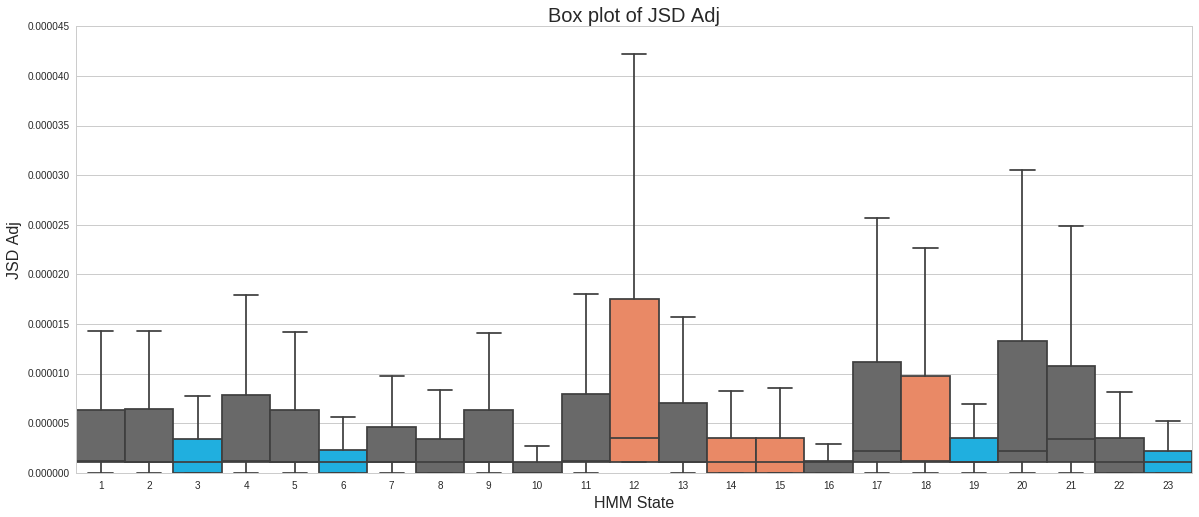

In [55]:
jsd_adj_sns_table = create_sns_table_from_flat_dict(states_JSD_adj_dict_0s, "JSD Adj")
plot_box_plot(jsd_adj_sns_table, "JSD Adj", "Box plot of JSD Adj", "box_plot_JSD_Adj_trim_0s", True)

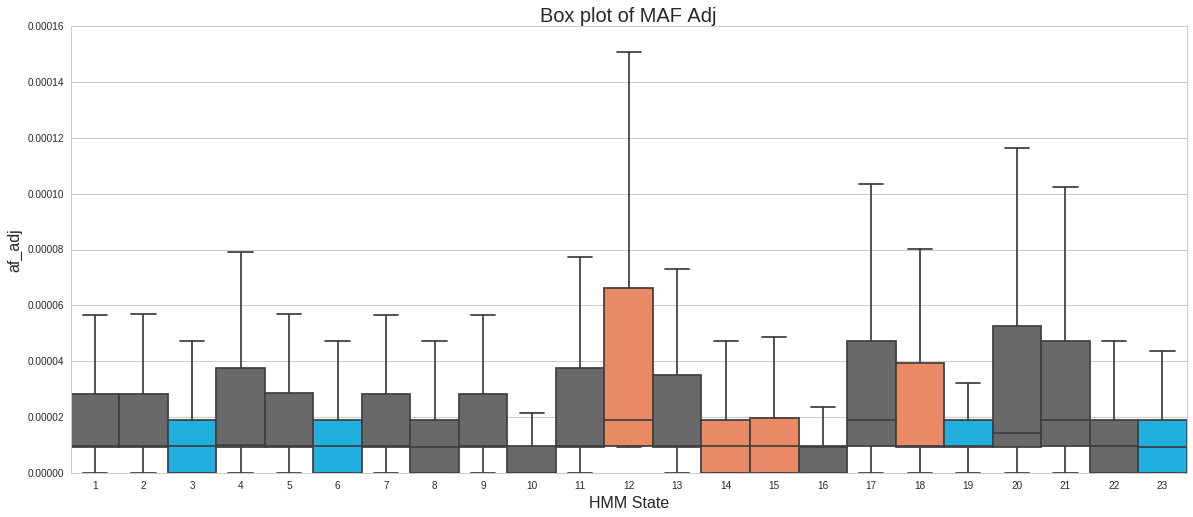

In [61]:
maf_adj_sns_table = create_sns_table_from_flat_dict(states_MAF_adj_dict_0s, "af_adj")
plot_box_plot(maf_adj_sns_table, "af_adj", "Box plot of MAF Adj", "box_plot_JSD_Adj_trim_0s", False)

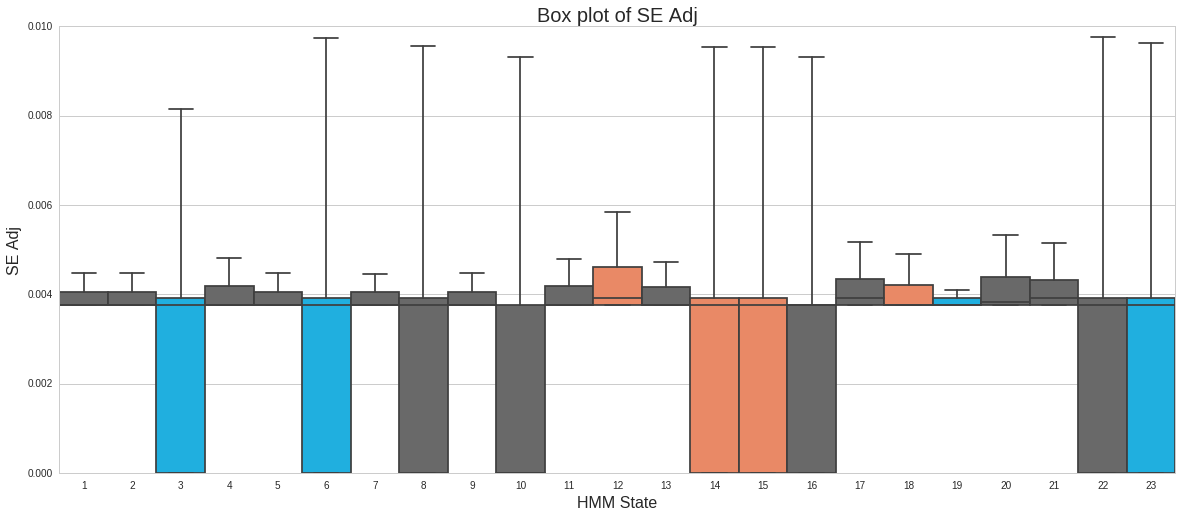

In [46]:
se_adj_sns_table = create_sns_table_from_flat_dict(states_SE_adj_dict_0s, "SE Adj")
plot_box_plot(se_adj_sns_table, "SE Adj", "Box plot of SE Adj", "box_plot_SE_Adj_trim_0s", False)

In [258]:
no_outliers_states_JSD_adj_dict_0s = remove_outliers(states_JSD_adj_dict_0s)
no_outliers_states_JSD_adj_dict_0s_emd = compute_pymed_emd(no_outliers_states_JSD_adj_dict_0s, 1000)

In [265]:
no_outliers_states_JSD_adj_dict_0s[1]

array([ 0.        ,  0.        ,  0.        , ...,  0.00245443,
        0.00491372,  0.00982613])

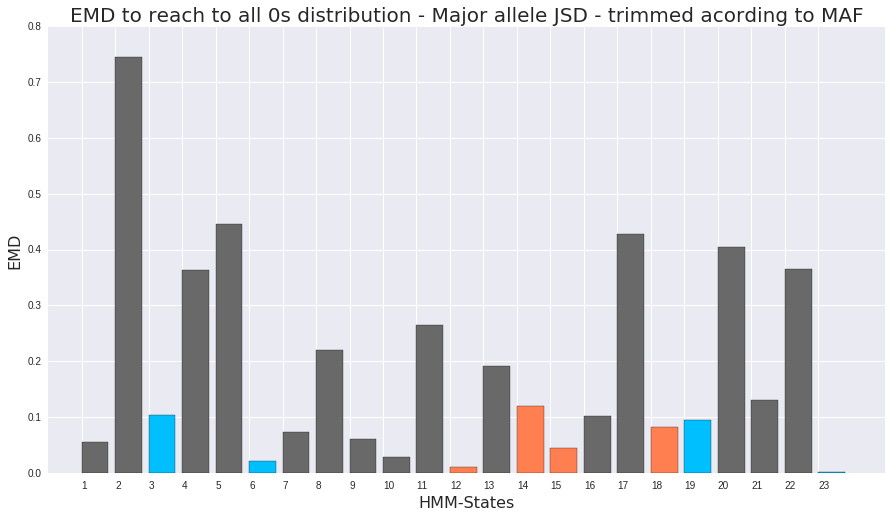

In [254]:
plot_emd(trim0s_emd_dict, "Major allele JSD - trimmed acording to MAF", "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

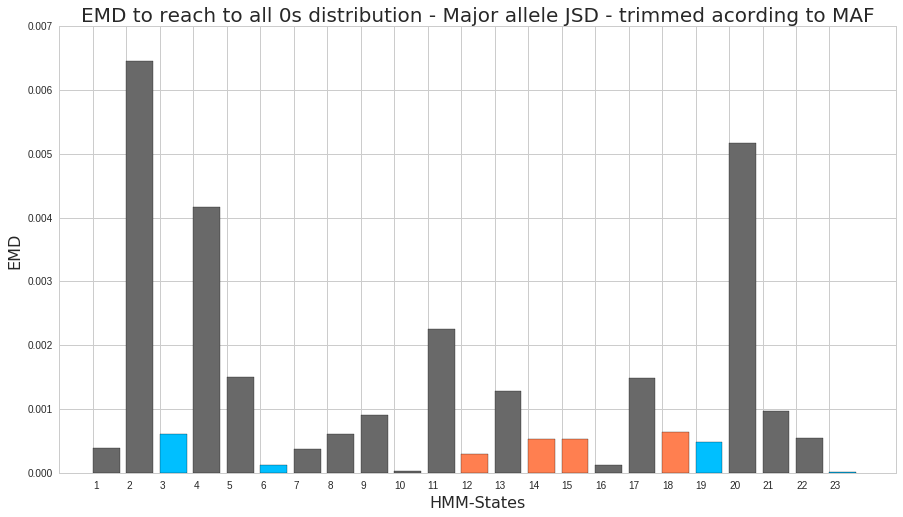

In [259]:
plot_emd(no_outliers_states_JSD_adj_dict_0s_emd, "Major allele JSD - trimmed acording to MAF", "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

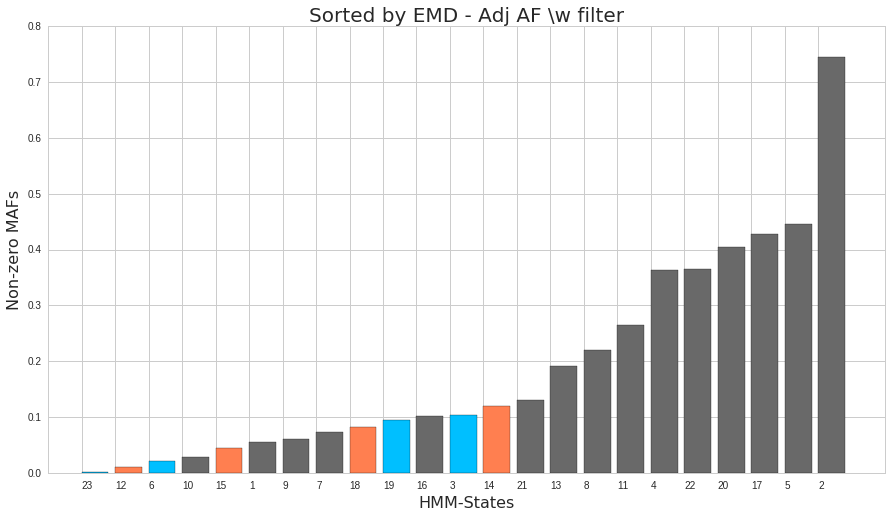

In [261]:
plot_sorted(trim0s_emd_dict.values(), "Sorted by EMD", "Adj AF \w filter", "Sorted_EMD_MAF_Adj_filter", False, False)

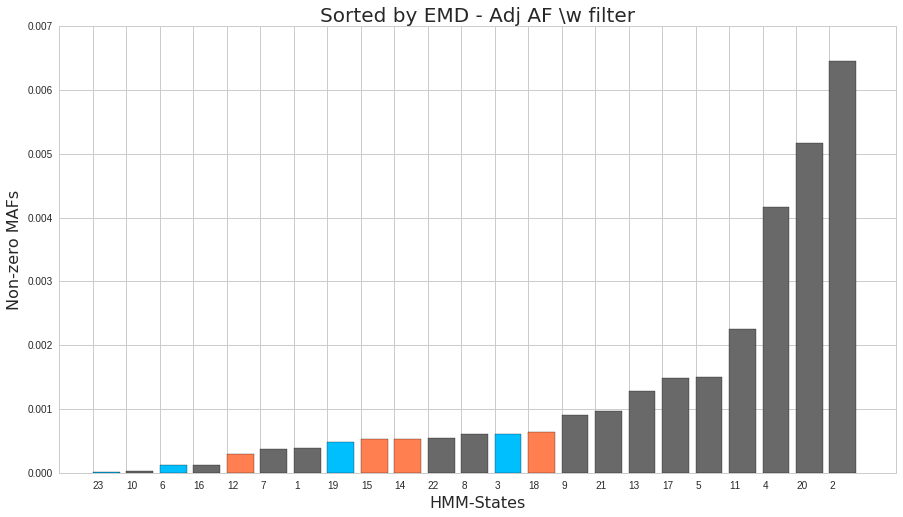

In [262]:
plot_sorted(no_outliers_states_JSD_adj_dict_0s_emd.values(), "Sorted by EMD", "Adj AF \w filter", "Sorted_EMD_MAF_Adj_filter", False, False)

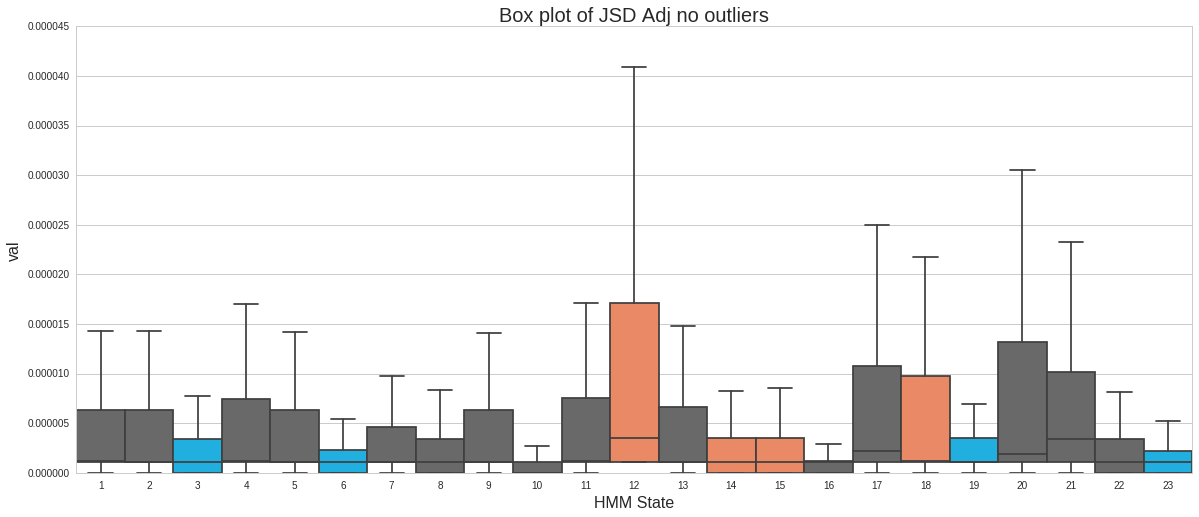

In [287]:
no_outliers_sns_table = create_sns_table_from_flat_dict(no_outliers_states_JSD_adj_dict_0s)
plot_box_plot(no_outliers_sns_table, "val", "Box plot of JSD Adj no outliers", "box_plot_JSD_Adj_trim_0s", True)

### Trim % of 0s before EMD

In [ ]:
#Count the number of zero Adj MAF
zero_adj_af = [0] * states_num
for state in states_dict.keys():
    for d in states_dict[state]:
        if (d["af_adj"] == 0):
            zero_adj_af[state-1] += 1

In [86]:
#Trim each state by the same % of 0 data points
trim_per = 0.9

states_dict_0s_per = states_dict.copy()
for state in states_dict_0s.keys():
    #Sort the state list
    state_sorted = sorted(states_dict_0s_per[state], key=lambda k: k['af_adj'])
    trim_num = int(np.round(zero_adj_af[state-1] * trim_per))
    states_dict_0s_per[state] = state_sorted[trim_num:]

In [87]:
#Create a dictionary for JSD adj values only
states_JSD_adj_dict_0s_per = defaultdict(list)
for state in states_dict_0s_per.keys():
    for d in states_dict_0s_per[state]:
        states_JSD_adj_dict_0s_per[state].append(d["JSD_adj"])

In [90]:
#Create a dictionary for SE adj values only
states_SE_adj_dict_0s_per = defaultdict(list)
for state in states_dict_0s_per.keys():
    for d in states_dict_0s_per[state]:
        states_SE_adj_dict_0s_per[state].append(d["SE_Adj"])

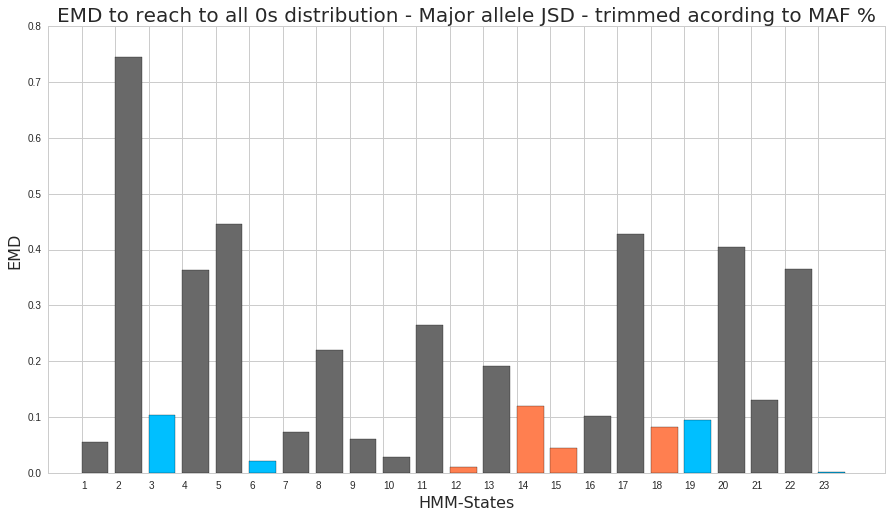

In [88]:
trim0s_per_jsd_emd_dict = compute_pymed_emd(states_JSD_adj_dict_0s_per, 1000)
plot_emd(trim0s_per_jsd_emd_dict, "Major allele JSD - trimmed acording to MAF %", "SNP_Zinc_filter_JSD_Major_allele_EMD", False, False)

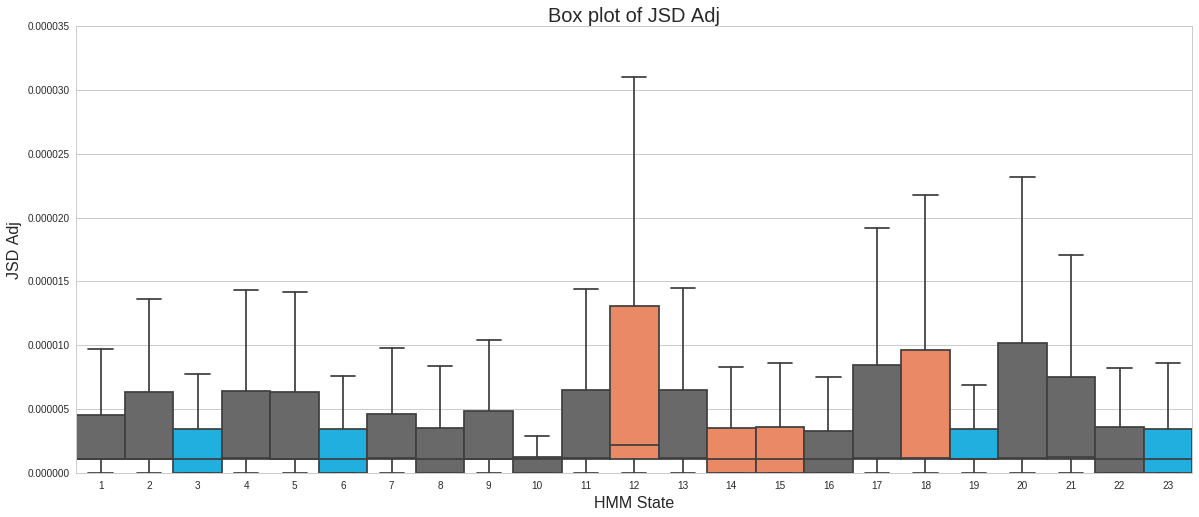

In [89]:
jsd_adj_sns_table_0s_per = create_sns_table_from_flat_dict(states_JSD_adj_dict_0s_per, "JSD Adj")
plot_box_plot(jsd_adj_sns_table_0s_per, "JSD Adj", "Box plot of JSD Adj", "box_plot_JSD_Adj_trim_0s_per", False)

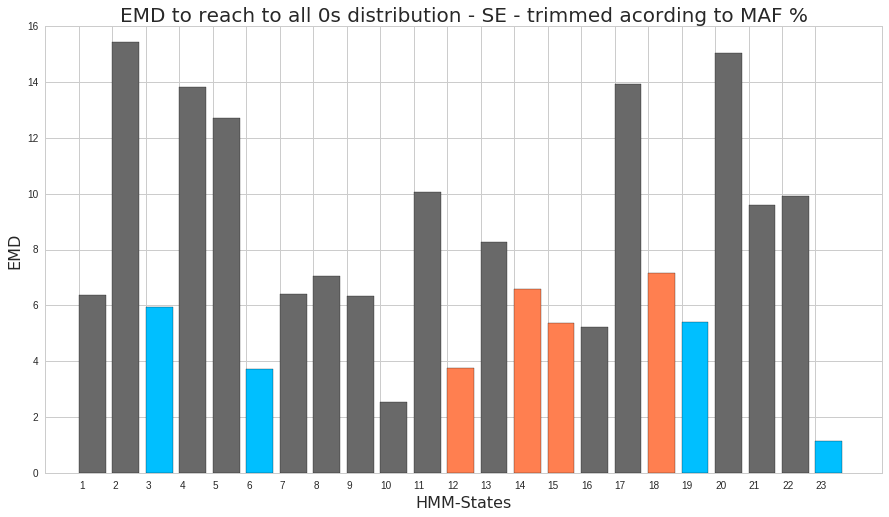

In [91]:
trim0s_per_se_emd_dict = compute_pymed_emd(states_SE_adj_dict_0s_per, 1000)
plot_emd(trim0s_per_se_emd_dict, "SE - trimmed acording to MAF %", "SNP_Zinc_filter_SE_allele_EMD", False, False)

In [98]:
len(states_SE_adj_dict_0s_per[2])

1305

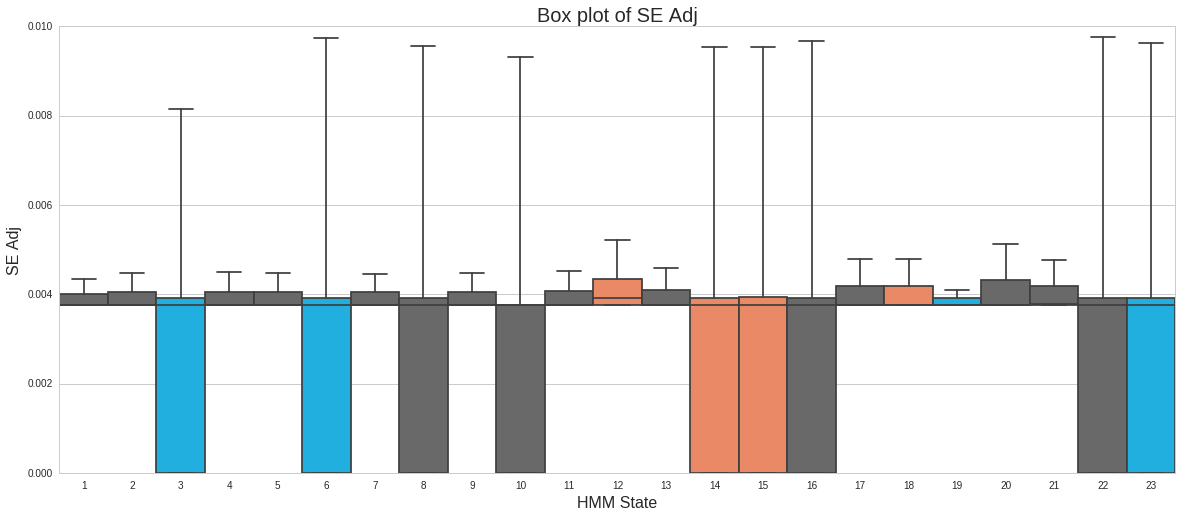

In [92]:
se_adj_sns_table_0s_per = create_sns_table_from_flat_dict(states_SE_adj_dict_0s_per, "SE Adj")
plot_box_plot(se_adj_sns_table_0s_per, "SE Adj", "Box plot of SE Adj", "box_plot_SE_Adj_trim_0s_per", False)

## Test code

### Plot States Average

In [113]:
avg_af_dict = {}
avg_af_adj_dict = {}
std_af_adj_dict = {}
for state in states_dict.keys():
    af_sum = 0
    af_adj_sum = 0
    af_adj_list = []
    
    for d in states_dict[state]:
        af_sum += d["af"]
        af_adj_sum += d["af_adj"]
        af_adj_list.append(d["af_adj"])
        
    af_avg = af_sum/float(len(states_dict[state]))
    af_adj_avg = af_adj_sum/float(len(states_dict[state]))
    std_af_adj_dict[state] = np.std(af_adj_list)
    avg_af_dict[state] = af_avg
    avg_af_adj_dict[state] = af_adj_avg

In [ ]:
#plt.figure(figsize=(15,8))
plt.bar(avg_af_dict.keys(), avg_af_dict.values())
plt.xticks(np.arange(1,states_num + 1), avg_af_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average AF of ExAC aligned to Zinc finger HMM states")
#plt.savefig(curr_dir[0]+"/EMD_plots/SNP_Homeobox_Avg.pdf")
plt.show()

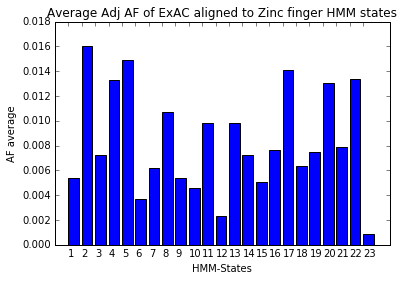

In [116]:
plt.bar(std_af_adj_dict.keys(), std_af_adj_dict.values())
plt.xticks(np.arange(1,states_num + 1), std_af_adj_dict.keys(), ha='left')
plt.xlabel("HMM-States")
plt.ylabel("AF average")
plt.title("Average Adj AF of ExAC aligned to Zinc finger HMM states")
plt.show()

In [16]:
sns.set_style("whitegrid", {'axes.grid' : False})

### EMD bins implementation

In [69]:
af_emd_bins_dict = compute_bins_emd(states_af_dict, 1000)
af_adj_emd_bins_dict = compute_bins_emd(states_af_adj_dict, 1000)

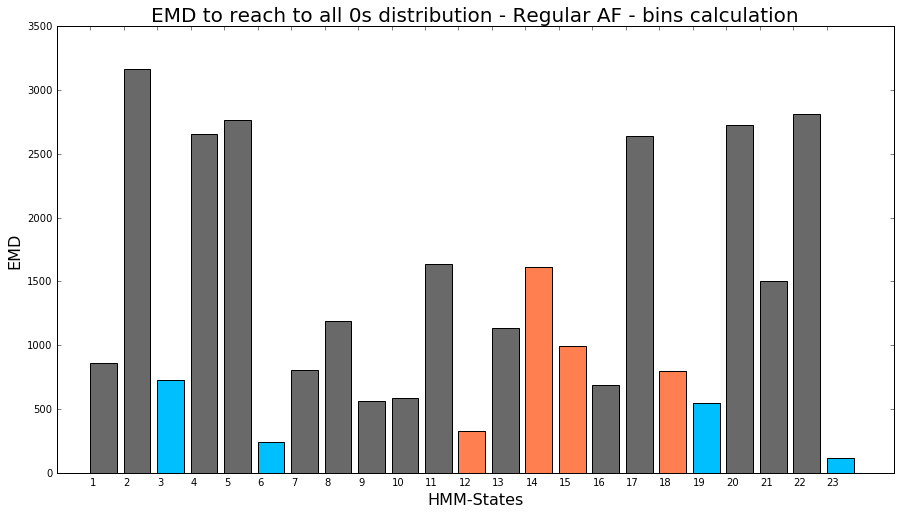

In [71]:
plot_emd(af_emd_bins_dict, "Regular AF - bins calculation", "")

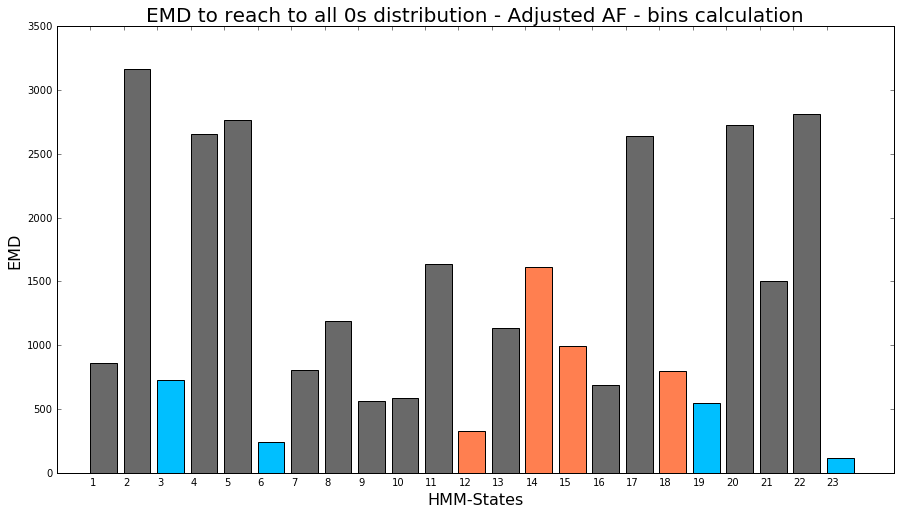

In [72]:
plot_emd(af_adj_emd_bins_dict, "Adjusted AF - bins calculation", "")

### Explore States distribution

### Plot Scatter of AF and coverage

### box plots

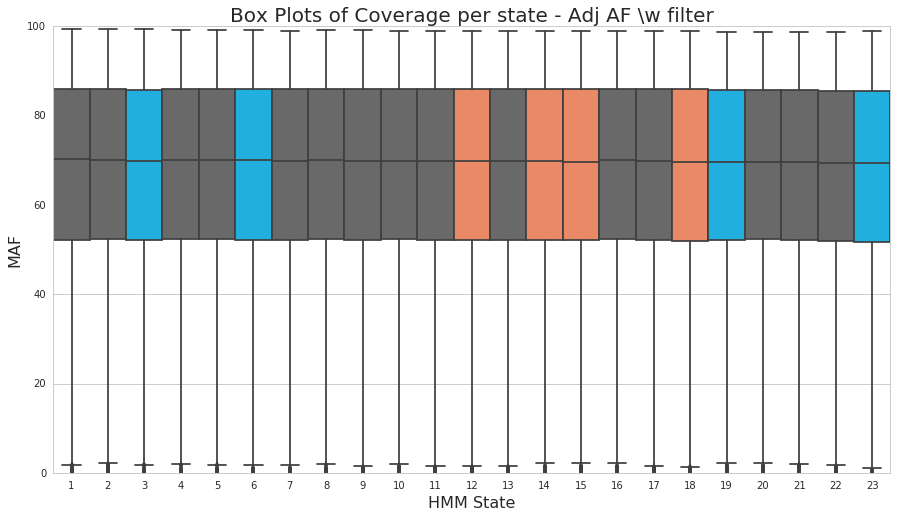

In [207]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
colors = ['dimgrey', 'dimgrey', 'deepskyblue', 'dimgrey', 'dimgrey', 'deepskyblue', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'coral', 
          'dimgrey', 'coral', 'coral', 'dimgrey', 'dimgrey', 'coral', 'deepskyblue', 'dimgrey', 'dimgrey', 'dimgrey', 'deepskyblue']

ax = sns.boxplot(x="state", y="coverage_mean", data=sns_table, width=1, palette=colors)
ax.set_xticklabels(states_dict.keys())

plt.xlabel("HMM State", fontsize=16)
plt.ylabel("MAF", fontsize=16)
plt.title("Box Plots of Coverage per state - Adj AF \w filter", fontsize=20)

plt.savefig(curr_dir[0]+"/plots/Cov_boxplot_Adj_filter.pdf")

plt.show()